In [41]:
import torch
import torchvision
print(f"torch version: {torch.__version__}")
print(f"torchvision version: {torchvision.__version__}")

torch version: 2.5.1+cpu
torchvision version: 0.20.1+cpu


In [42]:
from torch import nn
from torchvision import transforms
from torchinfo import summary
import matplotlib.pyplot as plt

In [50]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [60]:
import os
from pathlib import Path

data_path = Path("AI-img-VS-Real-img")

ai_dir = data_path / "AiArtData" 
real_dir = data_path / "RealArt" 

In [61]:
ai_dir

WindowsPath('AI-img-VS-Real-img/AiArtData')

In [66]:
real_image_path_list

[WindowsPath('AI-img-VS-Real-img/RealArt/-man-sits-with-a-woman-on-her-phone-at-a-table-while-looking-at-a-computer_l.jpg'),
 WindowsPath('AI-img-VS-Real-img/RealArt/-Skills-Promo-A-Total-Artist-All-of-North-Wests-Impressive-Drawings-Photos-5.jpg'),
 WindowsPath('AI-img-VS-Real-img/RealArt/02-still-for-america-room-loop-superJumbo.jpg'),
 WindowsPath('AI-img-VS-Real-img/RealArt/05-12-21-happy-people.jpg'),
 WindowsPath('AI-img-VS-Real-img/RealArt/0ogZjy9KvWg2elv-I.jpg'),
 WindowsPath('AI-img-VS-Real-img/RealArt/1-shutterstock_588634790.jpg'),
 WindowsPath('AI-img-VS-Real-img/RealArt/10-tips-for-stunning-portrait-photography-7.jpg'),
 WindowsPath('AI-img-VS-Real-img/RealArt/10-tips-for-stunning-portrait-photography-9.jpg'),
 WindowsPath('AI-img-VS-Real-img/RealArt/1000_F_553971391_58CnJ3qSdxmrOFUp6eojyVhZ9khKq2Et.jpg'),
 WindowsPath('AI-img-VS-Real-img/RealArt/1010172.jpg'),
 WindowsPath('AI-img-VS-Real-img/RealArt/1013032_credit_wspa-jiri_rezac.jpg'),
 WindowsPath('AI-img-VS-Real-img/R

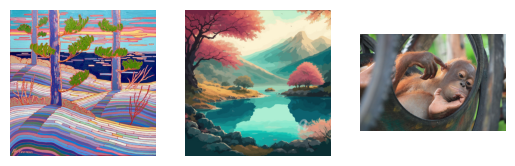

In [65]:
import random
from PIL import Image
real_image_path_list = list(Path(real_dir).glob("*.jpg"))
random_real_image = random.sample(real_image_path_list, k=3)

i = 1
for image_path in random_real_image:
    plt.subplot(1, 3, i)
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis(False)
    i += 1

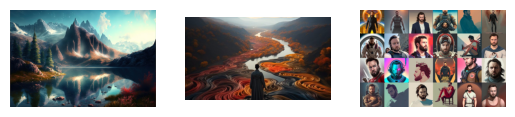

In [67]:
import random
from PIL import Image
ai_image_path_list = list(Path(ai_dir).glob("*.jpg"))
random_ai_image = random.sample(ai_image_path_list, k=3)

i = 1
for image_path in random_ai_image:
    plt.subplot(1, 3, i)
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis(False)
    i += 1

In [68]:

new_data_path = Path("data")
new_data_path.mkdir(parents=True, exist_ok=True)
train_path = new_data_path / "train"
test_path = new_data_path / "test"
os.mkdir(train_path)
os.mkdir(test_path)

train_ai_split = int(len(ai_image_path_list) * 0.8)
train_real_split = int(len(real_image_path_list) * 0.8)

train_ai_img = random.sample(ai_image_path_list, k=train_ai_split)
train_real_img = random.sample(real_image_path_list, k=train_real_split)

test_ai_img = []
test_real_img = []

for ai_img in ai_image_path_list:
    if ai_img not in train_ai_img:
        test_ai_img.append(ai_img)
    
for real_img in real_image_path_list:
    if real_img not in train_real_img:
        test_real_img.append(real_img)
print(f"ai_image_path_list: {len(ai_image_path_list)}")
print(f"real_image_path_list: {len(real_image_path_list)}")
print(f"train_ai_img: {len(train_ai_img)}")
print(f"train_real_img: {len(train_real_img)}")
print(f"test_ai_img: {len(test_ai_img)}")
print(f"test_real_img: {len(test_real_img)}")

ai_image_path_list: 385
real_image_path_list: 378
train_ai_img: 308
train_real_img: 302
test_ai_img: 77
test_real_img: 76


In [70]:
train_ai_path = train_path / "AiArt"
train_real_path = train_path / "RealArt"
test_ai_path = test_path / "AiArt"
test_real_path = test_path / "RealArt"

os.mkdir(train_ai_path)
os.mkdir(train_real_path)
os.mkdir(test_ai_path)
os.mkdir(test_real_path)

In [71]:
import shutil
for img in train_ai_img:
    shutil.copy(img, train_ai_path)
for img in train_real_img:
    shutil.copy(img, train_real_path)
for img in test_ai_img:
    shutil.copy(img, test_ai_path)
for img in test_real_img:
    shutil.copy(img, test_real_path)

In [72]:
weights = torchvision.models.ResNet152_Weights.DEFAULT
weights

ResNet152_Weights.IMAGENET1K_V2

In [73]:
auto_transforms = weights.transforms()
auto_transforms

ImageClassification(
    crop_size=[224]
    resize_size=[232]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [74]:
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_path,
                                 transform=auto_transforms)
test_data = datasets.ImageFolder(root=test_path,
                                transform=auto_transforms)
print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 610
    Root location: data\train
    StandardTransform
Transform: ImageClassification(
               crop_size=[224]
               resize_size=[232]
               mean=[0.485, 0.456, 0.406]
               std=[0.229, 0.224, 0.225]
               interpolation=InterpolationMode.BILINEAR
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 153
    Root location: data\test
    StandardTransform
Transform: ImageClassification(
               crop_size=[224]
               resize_size=[232]
               mean=[0.485, 0.456, 0.406]
               std=[0.229, 0.224, 0.225]
               interpolation=InterpolationMode.BILINEAR
           )


In [75]:
class_names = train_data.classes
class_names

['AiArt', 'RealArt']

In [76]:
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[-0.9192, -0.9192, -0.8164,  ..., -0.5938, -0.5424, -0.6794],
         [-1.0733, -1.0219, -0.9705,  ..., -0.4226, -0.4739, -0.6281],
         [-1.0390, -1.0390, -0.9020,  ..., -0.6623, -0.6623, -0.6965],
         ...,
         [-0.9192, -1.1760, -1.1418,  ..., -0.6281, -0.6965, -0.8335],
         [-1.0733, -0.9534, -1.1075,  ..., -0.3883, -0.3541, -0.4226],
         [-1.1589, -0.7308, -0.9534,  ..., -0.1657, -0.1828, -0.2684]],

        [[-1.2129, -1.1779, -1.1078,  ..., -0.7052, -0.6527, -0.7752],
         [-1.3529, -1.2829, -1.3004,  ..., -0.5476, -0.6001, -0.7577],
         [-1.3004, -1.3179, -1.2479,  ..., -0.8102, -0.8277, -0.8452],
         ...,
         [-1.0903, -1.3354, -1.3704,  ..., -1.0553, -1.0903, -1.2129],
         [-1.2654, -1.1253, -1.3354,  ..., -0.8627, -0.8627, -0.9153],
         [-1.3179, -0.9153, -1.1779,  ..., -0.6527, -0.7402, -0.8102]],

        [[-1.3513, -1.2990, -1.2119,  ..., -0.6193, -0.5844, -0.6890],
         [-1.3861, -1.3164, -1.

In [77]:
from torch.utils.data import DataLoader
num_workers = os.cpu_count()
train_dataloader = DataLoader(dataset=train_data,
                             batch_size=32,
                             num_workers=num_workers,
                             shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                            batch_size=32,
                            num_workers=num_workers,
                            shuffle=False)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x289769d5af0>,
 <torch.utils.data.dataloader.DataLoader at 0x289774d18e0>)

In [78]:
model = torchvision.models.resnet152(weights="IMAGENET1K_V2").to(device)

Downloading: "https://download.pytorch.org/models/resnet152-f82ba261.pth" to C:\Users\Dell/.cache\torch\hub\checkpoints\resnet152-f82ba261.pth
100%|██████████| 230M/230M [01:30<00:00, 2.66MB/s] 


In [79]:
summary(model=model,
        input_size=(32, 3, 224, 224),
       col_names=["input_size", "output_size", "num_params", "trainable"],
       col_width=20,
       row_settings=["var_names"])

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
ResNet (ResNet)                          [32, 3, 224, 224]    [32, 1000]           --                   True
├─Conv2d (conv1)                         [32, 3, 224, 224]    [32, 64, 112, 112]   9,408                True
├─BatchNorm2d (bn1)                      [32, 64, 112, 112]   [32, 64, 112, 112]   128                  True
├─ReLU (relu)                            [32, 64, 112, 112]   [32, 64, 112, 112]   --                   --
├─MaxPool2d (maxpool)                    [32, 64, 112, 112]   [32, 64, 56, 56]     --                   --
├─Sequential (layer1)                    [32, 64, 56, 56]     [32, 256, 56, 56]    --                   True
│    └─Bottleneck (0)                    [32, 64, 56, 56]     [32, 256, 56, 56]    --                   True
│    │    └─Conv2d (conv1)               [32, 64, 56, 56]     [32, 64, 56, 56]     4,096                True
│    │    └─BatchN

In [80]:
model.fc = nn.Sequential(
nn.Dropout(p=0.5),   
nn.Linear(in_features=2048, out_features=1024, bias=True),
nn.Dropout(p=0.5),
nn.Linear(in_features=1024, out_features=1, bias=True),
)

In [81]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [82]:
!pip install torcheval
import torcheval
from torcheval.metrics import BinaryAccuracy
def accuracy_fn(y_true: torch.Tensor, y_pred: torch.Tensor):
    metric = BinaryAccuracy(threshold=0.5)
    metric.update(y_pred, y_true)
    return metric.compute().item()


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/179.2 kB ? eta -:--:--
   -- ------------------------------------- 10.2/179.2 kB ? eta -:--:--
   -- ------------------------------------- 10.2/179.2 kB ? eta -:--:--
   -- ------------------------------------- 10.2/179.2 kB ? eta -:--:--
   ------------- ------------------------- 61.4/179.2 kB 409.6 kB/s eta 0:00:01
   ---------------------------- --------- 133.1/179.2 kB 657.1 kB/s eta 0:00:01
   -------------------------------------- 179.2/179.2 kB 771.5 kB/s eta 0:00:00


In [83]:
accuracy_fn(torch.tensor([0, 0, 0, 1]), torch.Tensor([0.2, 0.9, 0.9, 0.9]))

0.5

In [84]:
img, label = next(iter(train_dataloader))
pred = model(img.to(device))
print(pred.squeeze())
print(torch.sigmoid(pred.squeeze()))
pred.squeeze().shape, label.shape

tensor([ 0.2542, -0.0581,  0.0223,  0.3416,  0.3031, -0.0520, -0.0547,  0.4227,
         0.4365, -0.0587, -0.0514,  0.3131, -0.1062, -0.0880, -0.3266,  0.0315,
         0.0994,  0.1663, -0.1488, -0.2132,  0.0391, -0.5942,  0.0157,  0.0174,
         0.0641,  0.1071,  0.2799, -0.1296, -0.0359,  0.1639,  0.3542, -0.1008],
       grad_fn=<SqueezeBackward0>)
tensor([0.5632, 0.4855, 0.5056, 0.5846, 0.5752, 0.4870, 0.4863, 0.6041, 0.6074,
        0.4853, 0.4872, 0.5776, 0.4735, 0.4780, 0.4191, 0.5079, 0.5248, 0.5415,
        0.4629, 0.4469, 0.5098, 0.3557, 0.5039, 0.5043, 0.5160, 0.5268, 0.5695,
        0.4676, 0.4910, 0.5409, 0.5876, 0.4748], grad_fn=<SigmoidBackward0>)


(torch.Size([32]), torch.Size([32]))

In [87]:
def train_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              optimizer: torch.optim.Optimizer,
              accuracy_fn):
    
    model.train()
    
    train_loss, train_acc = 0, 0
    
    for batch, (X, y) in enumerate(dataloader):
        
        X, y = X.to(device), y.to(device)
        
        y_pred = model(X).squeeze()
        
        loss = loss_fn(y_pred, y.float())
        train_loss += loss.item()


        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_acc += accuracy_fn(y_true=y, y_pred=torch.sigmoid(y_pred))
        
    train_loss /= len(dataloader)
    train_acc /= len(dataloader)
    
    return train_loss, train_acc

def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn):
    
       model.eval()
    
       test_loss, test_acc = 0, 0
    
       with torch.inference_mode():
        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)
            
            test_pred_logits = model(X).squeeze()
            
            loss = loss_fn(test_pred_logits, y.float())
            test_loss += loss.item()
            
            test_acc += accuracy_fn(y_true=y, y_pred=torch.sigmoid(test_pred_logits))
            
       test_loss /= len(dataloader)
       test_acc /= len(dataloader)
       return test_loss, test_acc

In [89]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
         loss_fn: torch.nn.Module,
         optimizer: torch.optim.Optimizer,
         train_dataloader: torch.utils.data.DataLoader,
         test_dataloader: torch.utils.data.DataLoader,
         accuracy_fn,
         epochs: int = 5):
    
    results = {
        "train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }
    for epoch in tqdm(range(epochs)):
        
            train_loss, train_acc = train_step(model=model,
                                          dataloader=train_dataloader,
                                          loss_fn=loss_fn,
                                          optimizer=optimizer,
                                          accuracy_fn=accuracy_fn)
            test_loss, test_acc = test_step(model=model,
                                        dataloader=test_dataloader,
                                        loss_fn=loss_fn,
                                        accuracy_fn=accuracy_fn)
        
            print(
                f"Epoch: {epoch+1} | "
                f"train_loss: {train_loss:.4f} | "
                f"train_acc: {train_acc:.4f} | "
                f"test_loss: {test_loss:.4f} | "
                f"test_acc: {test_acc:.4f}"
            )

            results["train_loss"].append(train_loss)
            results["train_acc"].append(train_acc)
            results["test_loss"].append(test_loss)
            results["test_acc"].append(test_acc)
        
    return results

c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

from timeit import default_timer as timer

start_time = timer()

results = train(model=model,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               train_dataloader=train_dataloader,
               test_dataloader=test_dataloader,
               epochs=10)

end_time = timer()
print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")

 10%|█         | 1/10 [06:43<1:00:34, 403.87s/it]

Epoch: 1 | train_loss: 0.6352 | train_acc: 0.6219 | test_loss: 10.5646 | test_acc: 0.4558


 20%|██        | 2/10 [11:02<42:25, 318.19s/it]  

Epoch: 2 | train_loss: 0.5910 | train_acc: 0.7422 | test_loss: 0.7143 | test_acc: 0.6395


 30%|███       | 3/10 [21:23<53:15, 456.53s/it]

Epoch: 3 | train_loss: 0.5327 | train_acc: 0.7672 | test_loss: 1.0217 | test_acc: 0.7028


 40%|████      | 4/10 [43:12<1:19:19, 793.27s/it]

Epoch: 4 | train_loss: 0.4930 | train_acc: 0.7875 | test_loss: 2.8471 | test_acc: 0.5742


 50%|█████     | 5/10 [47:38<50:15, 603.07s/it]  

Epoch: 5 | train_loss: 0.4249 | train_acc: 0.8297 | test_loss: 0.7438 | test_acc: 0.6572


 60%|██████    | 6/10 [50:23<30:16, 454.10s/it]

Epoch: 6 | train_loss: 0.4299 | train_acc: 0.8422 | test_loss: 0.7275 | test_acc: 0.7082


 70%|███████   | 7/10 [58:02<22:47, 455.68s/it]

Epoch: 7 | train_loss: 0.4140 | train_acc: 0.8313 | test_loss: 0.5437 | test_acc: 0.7072


 80%|████████  | 8/10 [1:01:20<12:27, 373.68s/it]

Epoch: 8 | train_loss: 0.3628 | train_acc: 0.8484 | test_loss: 0.7436 | test_acc: 0.7305


 90%|█████████ | 9/10 [1:04:09<05:09, 309.60s/it]

Epoch: 9 | train_loss: 0.4450 | train_acc: 0.8141 | test_loss: 0.6636 | test_acc: 0.6788


100%|██████████| 10/10 [1:06:55<00:00, 401.56s/it]

Epoch: 10 | train_loss: 0.2973 | train_acc: 0.8781 | test_loss: 0.8330 | test_acc: 0.7207
[INFO] Total training time: 4015.648 seconds


In [101]:
from typing import Dict, List

def plot_loss_curves(results: Dict[str, List[float]]):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """
        
  
  
  
    loss = results['train_loss']
    test_loss = results['test_loss']

    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    epochs = range(len(results['train_loss']))

    plt.figure(figsize=(15, 7))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

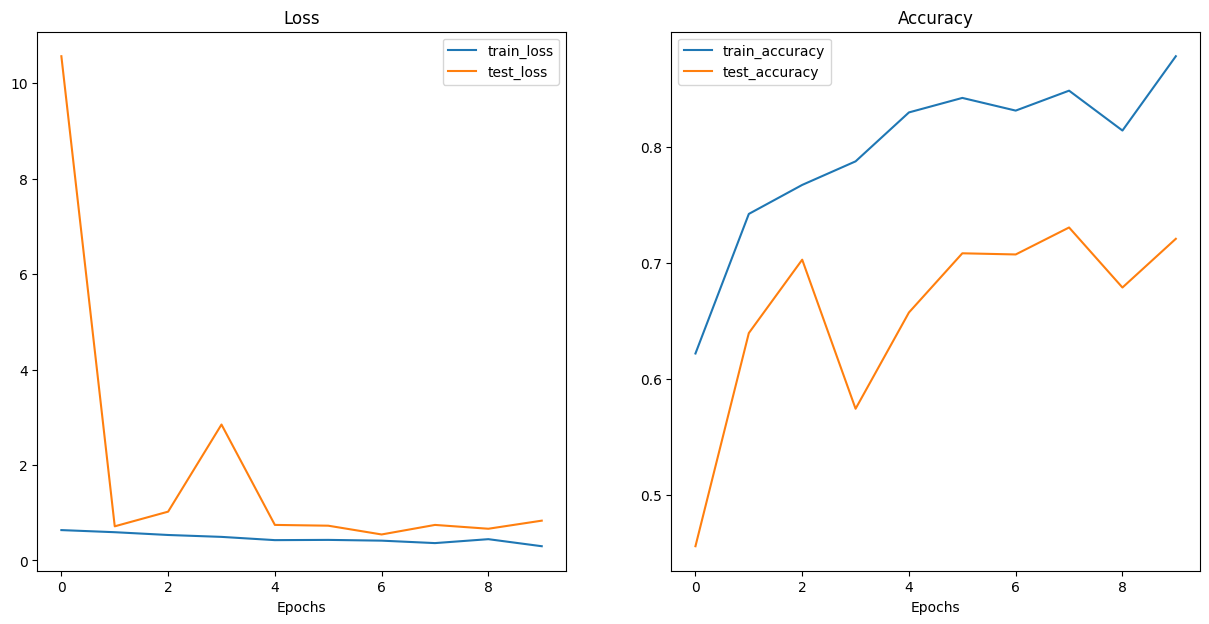

In [92]:
plot_loss_curves(results)

In [ ]:
   
   
from typing import List, Tuple

from PIL import Image

def pred_and_plot_image(model, image_path, class_names, transform, image_size, label):
    from PIL import Image
    import matplotlib.pyplot as plt
    import torch

    # Load and preprocess the image
    image = Image.open(image_path).convert("RGB")
    if transform:
        image = transform(image).detach()  # Detach to avoid backward computation

    # Add batch dimension
    input_tensor = image.unsqueeze(0)

    # Set model to evaluation mode
    model.eval()

    # Perform inference with no gradient tracking
    with torch.no_grad():
        output = model(input_tensor)

    # Get predicted class
    _, predicted_class = torch.max(output, dim=1)
    predicted_label = class_names[predicted_class.item()]


    plt.imshow(Image.open(image_path))
    plt.title(f"Label: {label}\nPrediction: {predicted_label}")
    plt.axis('off')
    plt.show()


In [104]:
MODEL_PATH = Path("model")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "resnet152_ai_vs_real_img_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
torch.save(obj=model.state_dict(),
          f=MODEL_SAVE_PATH)

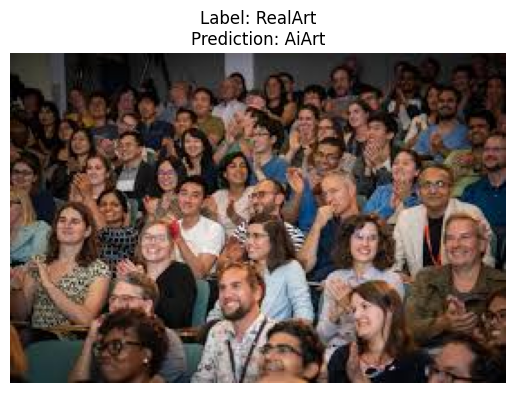

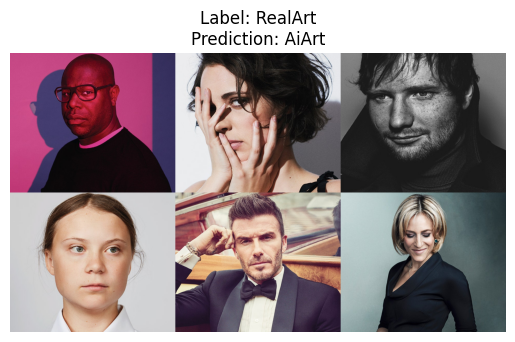

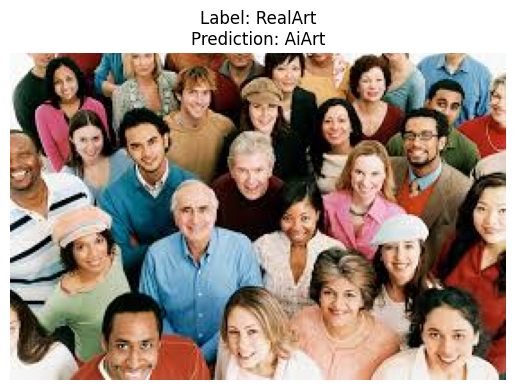

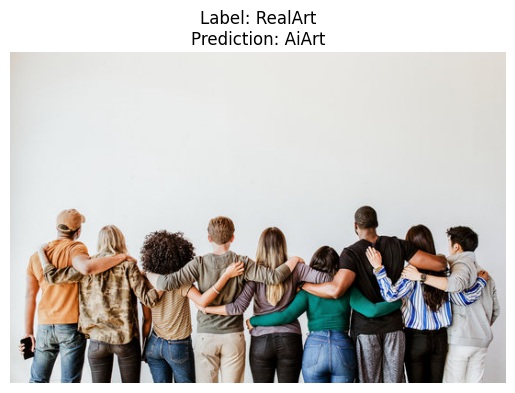

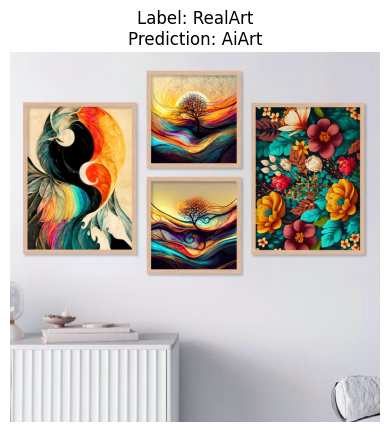

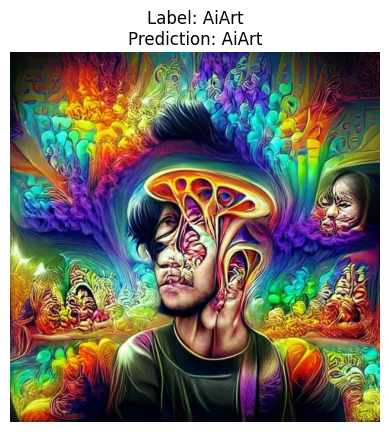

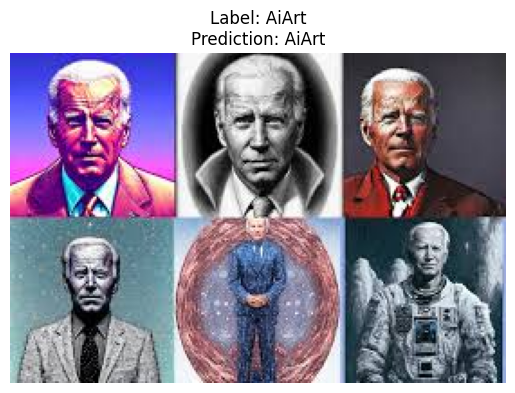

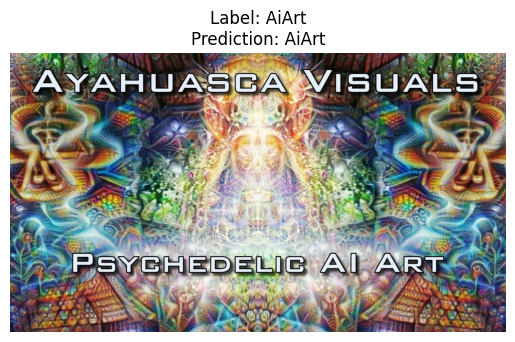

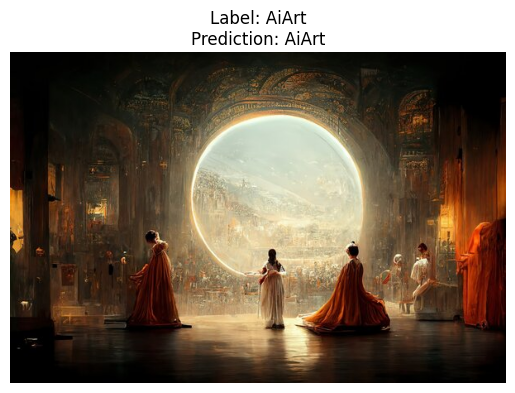

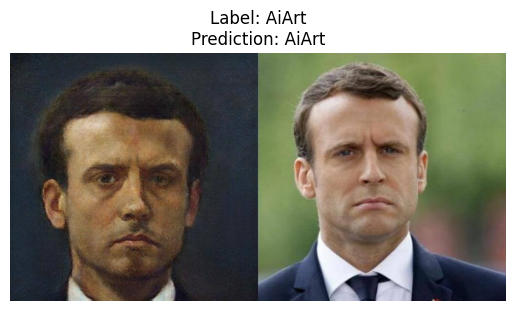

In [109]:


import random
num_images_to_plot = 5
test_real_list = list(Path(test_path).glob("RealArt/*.jpg")) 
test_real_sample = random.sample(population=test_real_list, 
                                       k=num_images_to_plot) 
test_ai_list = list(Path(test_path).glob("AiArt/*.jpg")) 
test_ai_sample = random.sample(population=test_ai_list, 
                                       k=num_images_to_plot) 
for image_path in test_real_sample:
    pred_and_plot_image(model=model, 
                        image_path=image_path,
                        class_names=class_names,
                        transform=weights.transforms(),
                        image_size=(224, 224),
                       label="RealArt")
for image_path in test_ai_sample:
    pred_and_plot_image(model=model, 
                        image_path=image_path,
                        class_names=class_names,
                        transform=weights.transforms(),
                        image_size=(224, 224),
                       label="AiArt")

In [ ]:
import streamlit as st
from PIL import Image
import torch
from torchvision import models, transforms


@st.cache_resource
def load_model():
    

    model = models.resnet152(num_classes=2)  
    
    
    model.load_state_dict(torch.load("model/resnet152_ai_vs_real_img_model.pth", map_location=torch.device('cpu')), strict=False)
    
  
    model.eval()
    return model

model = load_model()


transform = transforms.Compose([
    transforms.Resize((224, 224)),  
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  
])

# Define class names
class_names = ["Real", "Fake"]

# Streamlit app UI
st.title("Real or Fake Art Classifier")
st.write("Upload an image to determine if it's 'Real' or 'Fake' art.")

# File uploader
uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "png", "jpeg"])

if uploaded_file is not None:
    # Display uploaded image
    image = Image.open(uploaded_file).convert("RGB")
    st.image(image, caption="Uploaded Image", use_column_width=True)

    # Process and classify the image
    if st.button("Classify"):
        # Apply transformations
        input_tensor = transform(image).unsqueeze(0)

        # Perform inference
        with torch.no_grad():
            output = model(input_tensor)
            _, predicted_class = torch.max(output, 1)
            predicted_label = class_names[predicted_class.item()]

        # Display the result
        st.write(f"Prediction: **{predicted_label}**")





2024-11-28 16:59:17.873 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-28 16:59:17.873 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-28 16:59:17.873 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
C:\Users\Dell\AppData\Local\Temp\ipykernel_25156\2046013667.py:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded

In [ ]:
!streamlit run aii.py 